In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataexport_20200401T140233.csv',infer_datetime_format=True)

In [172]:
df.head(10)

,location,Basel,Basel.1,Basel.2,Basel.3
0,lat,47.54694,47.54694,47.54694,47.54694
1,lon,7.56892,7.56892,7.56892,7.56892
2,asl,283.697,283.697,283.697,283.697
3,variable,Temperature,Precipitation Total,Wind Speed,Wind Direction
4,unit,°C,mm,km/h,°
5,level,2 m elevation corrected,sfc,10 m,10 m
6,resolution,hourly,hourly,hourly,hourly
7,aggregation,None,None,None,None
8,timestamp,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Wind Speed [10 m],Basel Wind Direction [10 m]
9,20190201T0000,3.3305285,0.0,25.364021,126.027374


In [0]:
df= df.iloc[9:]

In [0]:
df.columns = ["Timestamp","Temperature","Precipitation","Wind_Speed","Wind_Direction"]

In [175]:
df

,Timestamp,Temperature,Precipitation,Wind_Speed,Wind_Direction
9,20190201T0000,3.3305285,0.0,25.364021,126.027374
10,20190201T0100,4.4105287,0.0,18.015022,156.46765
11,20190201T0200,4.7505283,0.0,15.59066,199.98311
12,20190201T0300,4.9805284,0.0,13.343954,206.0535
13,20190201T0400,6.1505284,0.0,9.974892,235.88553
...,...,...,...,...,...
8956,20200208T1900,10.440529,0.0,6.8075495,120.57922
8957,20200208T2000,7.6205287,0.0,6.0865254,156.8014
8958,20200208T2100,5.3805285,0.0,6.992683,162.25533
8959,20200208T2200,4.4905286,0.0,7.0533133,169.11447


In [0]:
cols =  ["Temperature","Precipitation","Wind_Speed","Wind_Direction"]
df[cols] = df[cols].applymap(np.float)
df[cols] = df[cols].round(2)

In [177]:
%pip install maya

In [178]:
import maya

dt = maya.parse('2018-04-29T0000').datetime()
print(dt.date())

2018-04-29


In [0]:
datetimes = df['Timestamp'].values
timestamp=[]
for datetime in datetimes:
  timestamp.append(maya.parse(datetime).datetime())
df.drop('Timestamp',axis=1)
df['Timestamp']=timestamp

In [180]:
df.head()

,Timestamp,Temperature,Precipitation,Wind_Speed,Wind_Direction
9,2019-02-01 00:00:00+00:00,3.33,0.0,25.36,126.03
10,2019-02-01 01:00:00+00:00,4.41,0.0,18.02,156.47
11,2019-02-01 02:00:00+00:00,4.75,0.0,15.59,199.98
12,2019-02-01 03:00:00+00:00,4.98,0.0,13.34,206.05
13,2019-02-01 04:00:00+00:00,6.15,0.0,9.97,235.89


In [0]:
df = df.set_index('Timestamp')

In [0]:
df = df.drop('Precipitation',axis=1)

In [0]:
df =df.drop('Wind_Speed',axis=1)

In [0]:
df = df.drop('Wind_Direction',axis=1)

In [185]:
df

,Temperature
Timestamp,
2019-02-01 00:00:00+00:00,3.33
2019-02-01 01:00:00+00:00,4.41
2019-02-01 02:00:00+00:00,4.75
2019-02-01 03:00:00+00:00,4.98
2019-02-01 04:00:00+00:00,6.15
...,...
2020-02-08 19:00:00+00:00,10.44
2020-02-08 20:00:00+00:00,7.62
2020-02-08 21:00:00+00:00,5.38


In [186]:
len(df)

8952

In [0]:
temp = df['Temperature'].values

In [0]:
i = 0
maxi = 0
mini = 0
maxarroftemp=[]
minarroftemp=[]
for tem in temp:
  if tem >= maxi:
    maxi = tem
    i=i+1
  else:
    mini = tem
    i=i+1
  if i == 24:
    maxarroftemp.append(maxi)
    minarroftemp.append(mini)
    i=0
  else:
    continue

In [194]:
len(maxarroftemp)

373

In [195]:
len(minarroftemp)

373

In [0]:
times = df.index.values

In [197]:
len(times)

8952

In [198]:
len(df)

8952

In [0]:
i = 0
arrofdates=[]
arrofdates.append(times[0])
for time in times:
  if i==23:
    arrofdates.append(time)
    i = 0
  else:
    i=i+1

In [241]:
arrofdates.pop(0)

numpy.datetime64('2019-02-01T00:00:00.000000000')

In [242]:
len(arrofdates)

373

In [0]:
df_max = pd.DataFrame(arrofdates)
df_min = pd.DataFrame(arrofdates)

In [0]:
df_max['timestamp']=arrofdates

In [0]:
df_min['timestamp']=arrofdates

In [0]:
df_max['maxTemp']=maxarroftemp

In [0]:
df_min['mixTemp']=minarroftemp

In [0]:
df_max = df_max.drop(0,axis=1)

In [0]:
df_min = df_min.drop(0,axis=1)

In [0]:
df_max = df_max.set_index('timestamp')

In [0]:
df_min = df_min.set_index('timestamp')

In [0]:
test_size= 30

In [0]:
test_ind = len(df)- test_size

In [0]:
train_max = df_max.iloc[:test_ind]
test_max = df_max.iloc[test_ind:]

In [0]:
train_min = df_min.iloc[:test_ind]
test_min = df_min.iloc[test_ind:]

In [304]:
train_max

,maxTemp
timestamp,
2019-02-01 23:00:00,8.69
2019-02-02 23:00:00,9.01
2019-02-03 23:00:00,9.01
2019-02-04 23:00:00,9.01
2019-02-05 23:00:00,9.01
...,...
2020-01-05 23:00:00,36.12
2020-01-06 23:00:00,36.12
2020-01-07 23:00:00,36.12


In [305]:
test_max

,maxTemp
timestamp,
2020-01-10 23:00:00,36.12
2020-01-11 23:00:00,36.12
2020-01-12 23:00:00,36.12
2020-01-13 23:00:00,36.12
2020-01-14 23:00:00,36.12
2020-01-15 23:00:00,36.12
2020-01-16 23:00:00,36.12
2020-01-17 23:00:00,36.12
2020-01-18 23:00:00,36.12


In [306]:
train_min

,mixTemp
timestamp,
2019-02-01 23:00:00,6.19
2019-02-02 23:00:00,4.24
2019-02-03 23:00:00,-0.64
2019-02-04 23:00:00,0.84
2019-02-05 23:00:00,1.82
...,...
2020-01-05 23:00:00,0.63
2020-01-06 23:00:00,3.22
2020-01-07 23:00:00,5.62


In [307]:
test_min

,mixTemp
timestamp,
2020-01-10 23:00:00,6.75
2020-01-11 23:00:00,3.18
2020-01-12 23:00:00,4.11
2020-01-13 23:00:00,6.38
2020-01-14 23:00:00,9.04
2020-01-15 23:00:00,8.05
2020-01-16 23:00:00,5.18
2020-01-17 23:00:00,5.44
2020-01-18 23:00:00,2.27


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler_max = MinMaxScaler()

In [0]:
scaler_min = MinMaxScaler()

In [313]:
scaler_max.fit(train_max)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [314]:
scaler_min.fit(train_min)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train_max = scaler_max.transform(train_max)
scaled_test_max = scaler_max.transform(test_max)

In [0]:
scaled_train_min = scaler_min.transform(train_min)
scaled_test_min = scaler_min.transform(test_min)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
length = 30
generator_max = TimeseriesGenerator(scaled_train_max, scaled_train_max, length=length, batch_size=1)

In [0]:
length = 30
generator_min = TimeseriesGenerator(scaled_train_min, scaled_train_min, length=length, batch_size=1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [0]:
n_features = 1

In [322]:
scaled_train_max.shape

(343, 1)

In [0]:
model_max = Sequential()
model_max.add(LSTM(150, activation='relu', input_shape=(length, n_features)))
model_max.add(Dense(1))
model_max.compile(optimizer='adam', loss='mse')

In [0]:
model_min = Sequential()
model_min.add(LSTM(150, activation='relu', input_shape=(length, n_features)))
model_min.add(Dense(1))
model_min.compile(optimizer='adam', loss='mse')

In [338]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91800     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 302       
Total params: 92,102
Trainable params: 92,102
Non-trainable params: 0
_________________________________________________________________


In [326]:
model_max.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [327]:
model_min.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [0]:
validation_generator_max = TimeseriesGenerator(scaled_test_max,scaled_test_max, length=length-1, batch_size=1)

In [0]:
validation_generator_min = TimeseriesGenerator(scaled_test_min,scaled_test_min, length=length-1, batch_size=1)

In [332]:
model_max.fit_generator(generator_max,epochs=20,
                    validation_data=validation_generator_max,
                   callbacks=[early_stop])

Epoch 1/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0156 - val_loss: 5.8676e-05
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0021 - val_loss: 0.0073
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0019 - val_loss: 3.2430e-04


In [336]:
model_min.fit_generator(generator_min,epochs=20,
                    validation_data=validation_generator_min,
                   callbacks=[early_stop])

Epoch 1/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0235 - val_loss: 2.7468e-04
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0155 - val_loss: 1.0787e-07
Epoch 3/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0144 - val_loss: 1.1333e-04
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0126 - val_loss: 1.0433e-05
Epoch 5/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0121 - val_loss: 9.3865e-04


In [0]:
n_features = scaled_train_max.shape[1]
test_predictions = []

first_eval_batch = scaled_train_max[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_max.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
true_predictions = scaler_max.inverse_transform(test_predictions)

In [349]:
true_predictions

array([[36.62310521],
       [36.69780959],
       [36.77001576],
       [36.84274839],
       [36.91553333],
       [36.98797167],
       [37.05978872],
       [37.13077521],
       [37.20079054],
       [37.26974315],
       [37.33757091],
       [37.40424112],
       [37.46973744],
       [37.53405658],
       [37.59719202],
       [37.65916337],
       [37.71997063],
       [37.77963996],
       [37.83818118],
       [37.89561062],
       [37.95189886],
       [38.00711131],
       [38.06127411],
       [38.11440362],
       [38.16650965],
       [38.21762817],
       [38.26776898],
       [38.31696152],
       [38.36521886],
       [38.41256063]])

In [0]:
max_pred=true_predictions

In [0]:
n_features = scaled_train_min.shape[1]
test_predictions = []

first_eval_batch = scaled_train_min[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_min.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
true_predictions = scaler_min.inverse_transform(test_predictions)

In [0]:
min_pred=true_predictions

In [357]:
test['max_pred']=max_pred
test['min_pred']=min_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


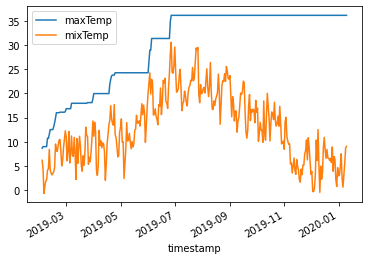

In [361]:
train.plot()

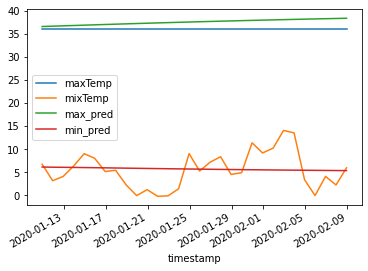

In [362]:
test.plot()